In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors

from flow.controllers.base_controller import BaseController
from flow.controllers.routing_controllers import ContinuousRouter
from flow.core.experiment import Experiment
from flow.core.params import EnvParams
from flow.core.params import InitialConfig
from flow.core.params import NetParams
from flow.core.params import SumoParams
from flow.core.params import VehicleParams
from flow.core.params import SumoCarFollowingParams
from flow.envs.ring.accel import AccelEnv
from flow.networks.ring import RingNetwork

from flow.visualize import time_space_diagram


In [2]:
ACCELERATION = 2
TARGET_VELOCITY = 30
HEADWAY_DIST = 10

class NaiveBaselineController(BaseController):
    def __init__(self, veh_id, v0=TARGET_VELOCITY, a0=ACCELERATION, s0=HEADWAY_DIST, car_following_params=None):
        """
        veh_id: unique vehicle identifier
        v0: desirable velocity, in m/s
        a0: rate of acceleration, in m/s2
        s0: headway threshold before braking, in m
        """
        
        BaseController.__init__(self, veh_id, car_following_params)
        self.v0 = v0
        self.a0 = a0
        self.s0 = s0

    def get_accel(self, env):
        v = env.k.vehicle.get_speed(self.veh_id)
        lead_id = env.k.vehicle.get_leader(self.veh_id)
        h = env.k.vehicle.get_headway(self.veh_id)

        if h < self.s0:  # car in front less than headway threshold away
            return -self.a0
        elif v < self.v0:
            return self.a0
        else:
            return 0

In [3]:
exp_name = "ring_network_baseline"

num_vehicles = 22

vehicles = VehicleParams()
vehicles.add(
    "robot",
    acceleration_controller=(NaiveBaselineController, {}),
    routing_controller=(ContinuousRouter, {}),
    num_vehicles=num_vehicles,
)

net_params = NetParams(additional_params={
    'length': 200*np.pi,  # 200m diameter
    'lanes': 1, 
    'speed_limit': TARGET_VELOCITY, 
    'resolution': 10000,
})

# initial_config = InitialConfig(spacing="uniform", perturbation=5)
initial_config = InitialConfig(spacing="random", min_gap=3)

env_params = EnvParams(
    additional_params={
        'max_accel': 2, 
        'max_decel': 2, 
        'target_velocity': TARGET_VELOCITY, 
        'sort_vehicles': False,
    },
    horizon=1000,  # number of time steps
)

sim_params = SumoParams(sim_step=0.1, render=False, emission_path='data')

flow_params = {
    'exp_tag': exp_name,
    'env_name': AccelEnv,
    'network': RingNetwork,
    'simulator': 'traci',
    'sim': sim_params,
    'env': env_params,
    'net': net_params,
    'veh': vehicles,
    'initial': initial_config,
}

In [4]:
exp = Experiment(flow_params)

# run the sumo simulation
_ = exp.run(10, convert_to_csv=True)

Round 0, return: 225.30216425636203
data/ring_network_baseline_20210514-1544261621003466.2929113-0_emission.csv data
Round 1, return: 225.10775797572373
data/ring_network_baseline_20210514-1544261621003466.2929113-1_emission.csv data
Round 2, return: 225.06342746263527
data/ring_network_baseline_20210514-1544261621003466.2929113-2_emission.csv data
Round 3, return: 224.13836779060134
data/ring_network_baseline_20210514-1544261621003466.2929113-3_emission.csv data
Round 4, return: 224.86242691023241
data/ring_network_baseline_20210514-1544261621003466.2929113-4_emission.csv data
Round 5, return: 224.6298401765025
data/ring_network_baseline_20210514-1544261621003466.2929113-5_emission.csv data
Round 6, return: 225.15546561148227
data/ring_network_baseline_20210514-1544261621003466.2929113-6_emission.csv data
Round 7, return: 224.69896317786342
data/ring_network_baseline_20210514-1544261621003466.2929113-7_emission.csv data
Round 8, return: 224.79394993298308
data/ring_network_baseline_20

In [5]:
# view results

emission_location = os.path.join(exp.env.sim_params.emission_path, exp.env.network.name)
# emission_location = "data/ring_network_baseline_20210514-0732301620973950.6346061"
print(emission_location)

data/ring_network_baseline_20210514-1544261621003466.2929113


In [6]:
data0 = pd.read_csv(emission_location + '-0_emission.csv')
data1 = pd.read_csv(emission_location + '-1_emission.csv')
data2 = pd.read_csv(emission_location + '-2_emission.csv')
data3 = pd.read_csv(emission_location + '-3_emission.csv')
data4 = pd.read_csv(emission_location + '-4_emission.csv')
data5 = pd.read_csv(emission_location + '-5_emission.csv')
data6 = pd.read_csv(emission_location + '-6_emission.csv')
data7 = pd.read_csv(emission_location + '-7_emission.csv')
data8 = pd.read_csv(emission_location + '-8_emission.csv')
data9 = pd.read_csv(emission_location + '-9_emission.csv')

data0.head()

,time,id,x,y,speed,headway,leader_id,target_accel_with_noise_with_failsafe,target_accel_no_noise_no_failsafe,target_accel_with_noise_no_failsafe,target_accel_no_noise_with_failsafe,realized_accel,road_grade,edge_id,lane_number,distance,relative_position,follower_id,leader_rel_speed
0,0.0,robot_0,117.588593,-0.063764,0.000000,43.590131,robot_1,NaN,NaN,NaN,NaN,0.000000,0,bottom,0,0.000000,17.424683,robot_11,0.000000
1,0.1,robot_0,117.608641,-0.061942,0.198020,43.570329,robot_1,2.0,2.0,2.0,2.0,1.980198,0,bottom,0,0.019802,17.444485,robot_11,-0.198020
2,0.2,robot_0,117.648501,-0.056574,0.396040,43.530725,robot_1,2.0,2.0,2.0,2.0,1.980198,0,bottom,0,0.059406,17.484089,robot_11,-0.396040
3,0.3,robot_0,117.707884,-0.045577,0.594059,43.471319,robot_1,2.0,2.0,2.0,2.0,1.980198,0,bottom,0,0.118812,17.543495,robot_11,-0.594059
4,0.4,robot_0,117.787061,-0.030915,0.792079,43.392112,robot_1,2.0,2.0,2.0,2.0,1.980198,0,bottom,0,0.198020,17.622702,robot_11,-0.792079


In [7]:
time_stationary = [
    data0[(data0.speed < 0.1) & (data0.time > 10)].dropna().shape[0]*0.1,
    data1[(data1.speed < 0.1) & (data1.time > 10)].dropna().shape[0]*0.1,
    data2[(data2.speed < 0.1) & (data2.time > 10)].dropna().shape[0]*0.1,
    data3[(data3.speed < 0.1) & (data3.time > 10)].dropna().shape[0]*0.1,
    data4[(data4.speed < 0.1) & (data4.time > 10)].dropna().shape[0]*0.1,
    data5[(data5.speed < 0.1) & (data5.time > 10)].dropna().shape[0]*0.1,
    data6[(data6.speed < 0.1) & (data6.time > 10)].dropna().shape[0]*0.1,
    data7[(data7.speed < 0.1) & (data7.time > 10)].dropna().shape[0]*0.1,
    data8[(data8.speed < 0.1) & (data8.time > 10)].dropna().shape[0]*0.1,
    data9[(data9.speed < 0.1) & (data9.time > 10)].dropna().shape[0]*0.1,
]

print(np.mean(time_stationary), np.std(time_stationary))

856.9399999999999 1.9719026345131685


In [8]:
frames = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]
overall = pd.concat(frames)

overall = overall[overall.time > 10]
print(overall.speed.mean(), overall.speed.var())

8.888526536746271 97.61445290288941


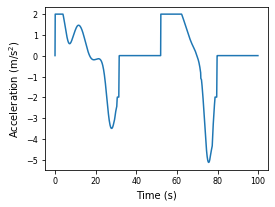

In [9]:
plt.figure(figsize=(4, 3))
plt.ylabel('Acceleration (m/s$^2$)', fontsize=10)
plt.xlabel('Time (s)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.plot(np.arange(0, 100, 0.1), data0[data0.id == "robot_0"].realized_accel[:1000])

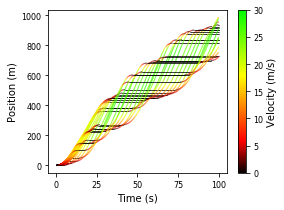

In [10]:
class MockArgs:
    max_speed = 30
    min_speed = 0
    start = 0

# some plotting parameters
cdict = {
    'red': ((0, 0, 0), (0.2, 1, 1), (0.6, 1, 1), (1, 0, 0)),
    'green': ((0, 0, 0), (0.2, 0, 0), (0.6, 1, 1), (1, 1, 1)),
    'blue': ((0, 0, 0), (0.2, 0, 0), (0.6, 0, 0), (1, 0, 0))
}
my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

# Read trajectory csv into pandas dataframe
traj_df = time_space_diagram.import_data_from_trajectory(emission_location + '-0_emission.csv', flow_params)

# Convert df data into segments for plotting
segs, traj_df = time_space_diagram.get_time_space_data(traj_df, flow_params)

# perform plotting operation
fig = plt.figure(figsize=(4, 3))
ax = plt.axes()

time_space_diagram.plot_tsd(ax, traj_df, segs, MockArgs(), my_cmap)

plt.show()